In [33]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
import matplotlib.pyplot as plt

In [34]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('diab_data.sqlite')

# Query to select data from the database
query = 'SELECT * FROM diabdata';

# Read data into a DataFrame
df = pd.read_sql_query(query, conn)

In [35]:
index = 'index'
df = df.drop(index, axis=1)
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,54.0,0,0,27.32,6.6,80,0
1,Male,28.0,0,0,27.32,5.7,158,0
2,Female,36.0,0,0,23.45,5.0,155,0
3,Female,20.0,0,0,27.32,6.6,85,0
4,Female,44.0,0,0,19.31,6.5,200,1
...,...,...,...,...,...,...,...,...
74389,Female,40.0,0,0,40.69,3.5,155,0
74390,Female,36.0,0,0,24.60,4.8,145,0
74391,Male,66.0,0,0,27.83,5.7,155,0
74392,Female,24.0,0,0,35.42,4.0,100,0


In [36]:
gender_mapping = {'Male': 1, 'Female': 2}
df['gender'] = df['gender'].map(gender_mapping)

In [37]:
# remove rows with NaN values
df = df.dropna()
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2.0,54.0,0,0,27.32,6.6,80,0
1,1.0,28.0,0,0,27.32,5.7,158,0
2,2.0,36.0,0,0,23.45,5.0,155,0
3,2.0,20.0,0,0,27.32,6.6,85,0
4,2.0,44.0,0,0,19.31,6.5,200,1
...,...,...,...,...,...,...,...,...
74389,2.0,40.0,0,0,40.69,3.5,155,0
74390,2.0,36.0,0,0,24.60,4.8,145,0
74391,1.0,66.0,0,0,27.83,5.7,155,0
74392,2.0,24.0,0,0,35.42,4.0,100,0


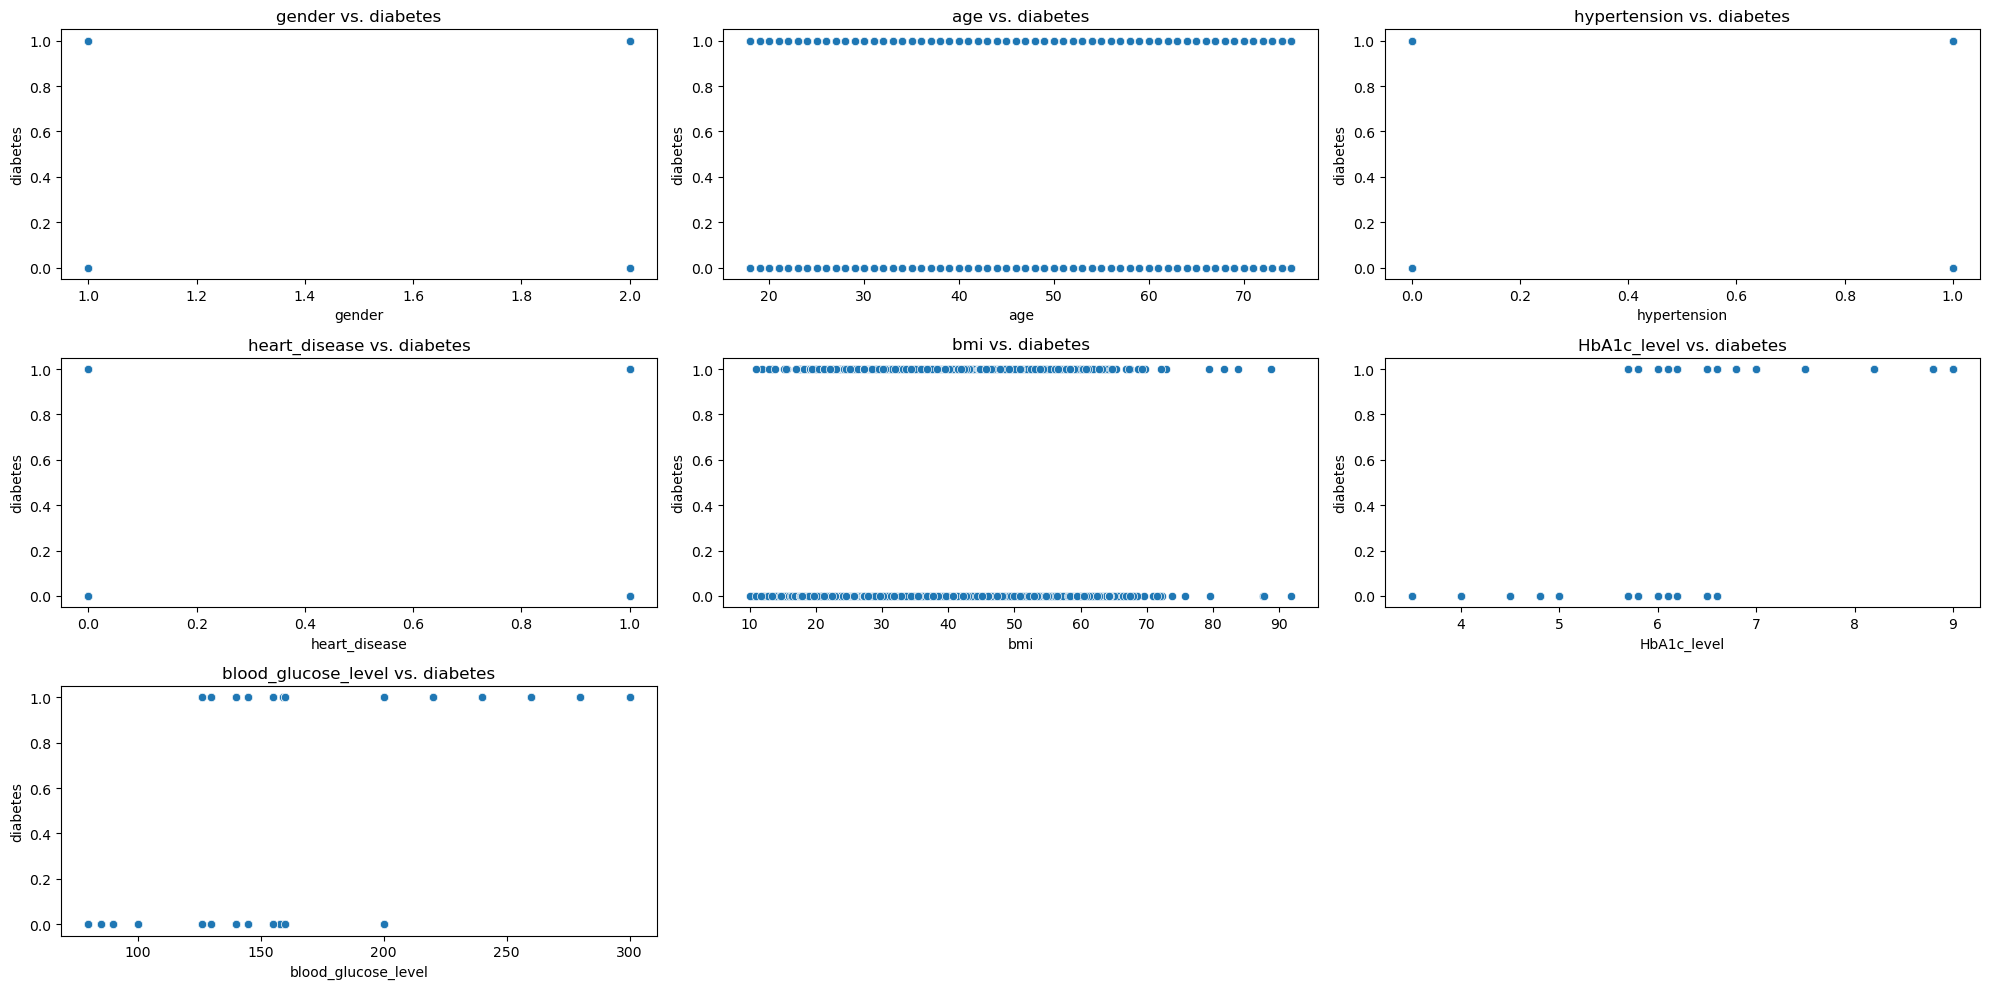

In [38]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database and load data
conn = sqlite3.connect('diab_data.sqlite')
query = 'SELECT * FROM diabdata'
df = pd.read_sql_query(query, conn)
conn.close()  

# Drop the 'index' column
df = df.drop('index', axis=1)

# Map gender to numerical values
gender_mapping = {'Male': 1, 'Female': 2}
df['gender'] = df['gender'].map(gender_mapping)

# Remove rows with NaN values
df = df.dropna()


target_variable = 'diabetes'

# List of features (column names) 
features = df.columns.drop(target_variable)

# Setting up the matplotlib figure
plt.figure(figsize=(20, 10))

# Looping through and creating a scatter plot for each feature
for i, feature in enumerate(features):
    plt.subplot(3, (len(features) + 2) // 3, i + 1)  
    sns.scatterplot(x=df[feature], y=df[target_variable])
    plt.title(f'{feature} vs. {target_variable}')

plt.tight_layout()
plt.show()


In [39]:
# Create a DataFrame to document the optimization process
optimization_results = pd.DataFrame(columns=['Model', 'Parameters', 'Accuracy'])

In [40]:
X = df.drop('diabetes', axis=1) 
y = df['diabetes']  # The target variable

# Splitting Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
print("Before Resampling:")
print("Non-Diabetic count:", sum(y == 0))
print("Diabetic count:", sum(y == 1))


Before Resampling:
Non-Diabetic count: 67548
Diabetic count: 6832


In [42]:
# Undersample the majority class (non-diabetes)
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [43]:
print("After Resampling:")
print("Non-Diabetic count:", sum(y_resampled == 0))
print("Diabetic count:", sum(y_resampled == 1))


After Resampling:
Non-Diabetic count: 6832
Diabetic count: 6832


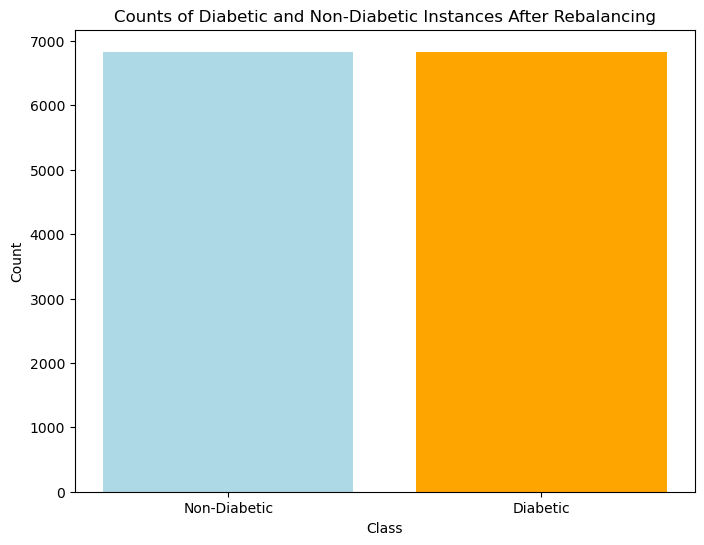

In [44]:
import matplotlib.pyplot as plt

# Count the instances of each class in the rebalanced dataset
diabetic_count = sum(y_resampled == 1)
non_diabetic_count = sum(y_resampled == 0)

# Data for plotting
classes = ['Non-Diabetic', 'Diabetic']
counts = [non_diabetic_count, diabetic_count]

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(classes, counts, color=['#ADD8E6', '#FFA500'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Counts of Diabetic and Non-Diabetic Instances After Rebalancing')
plt.show()


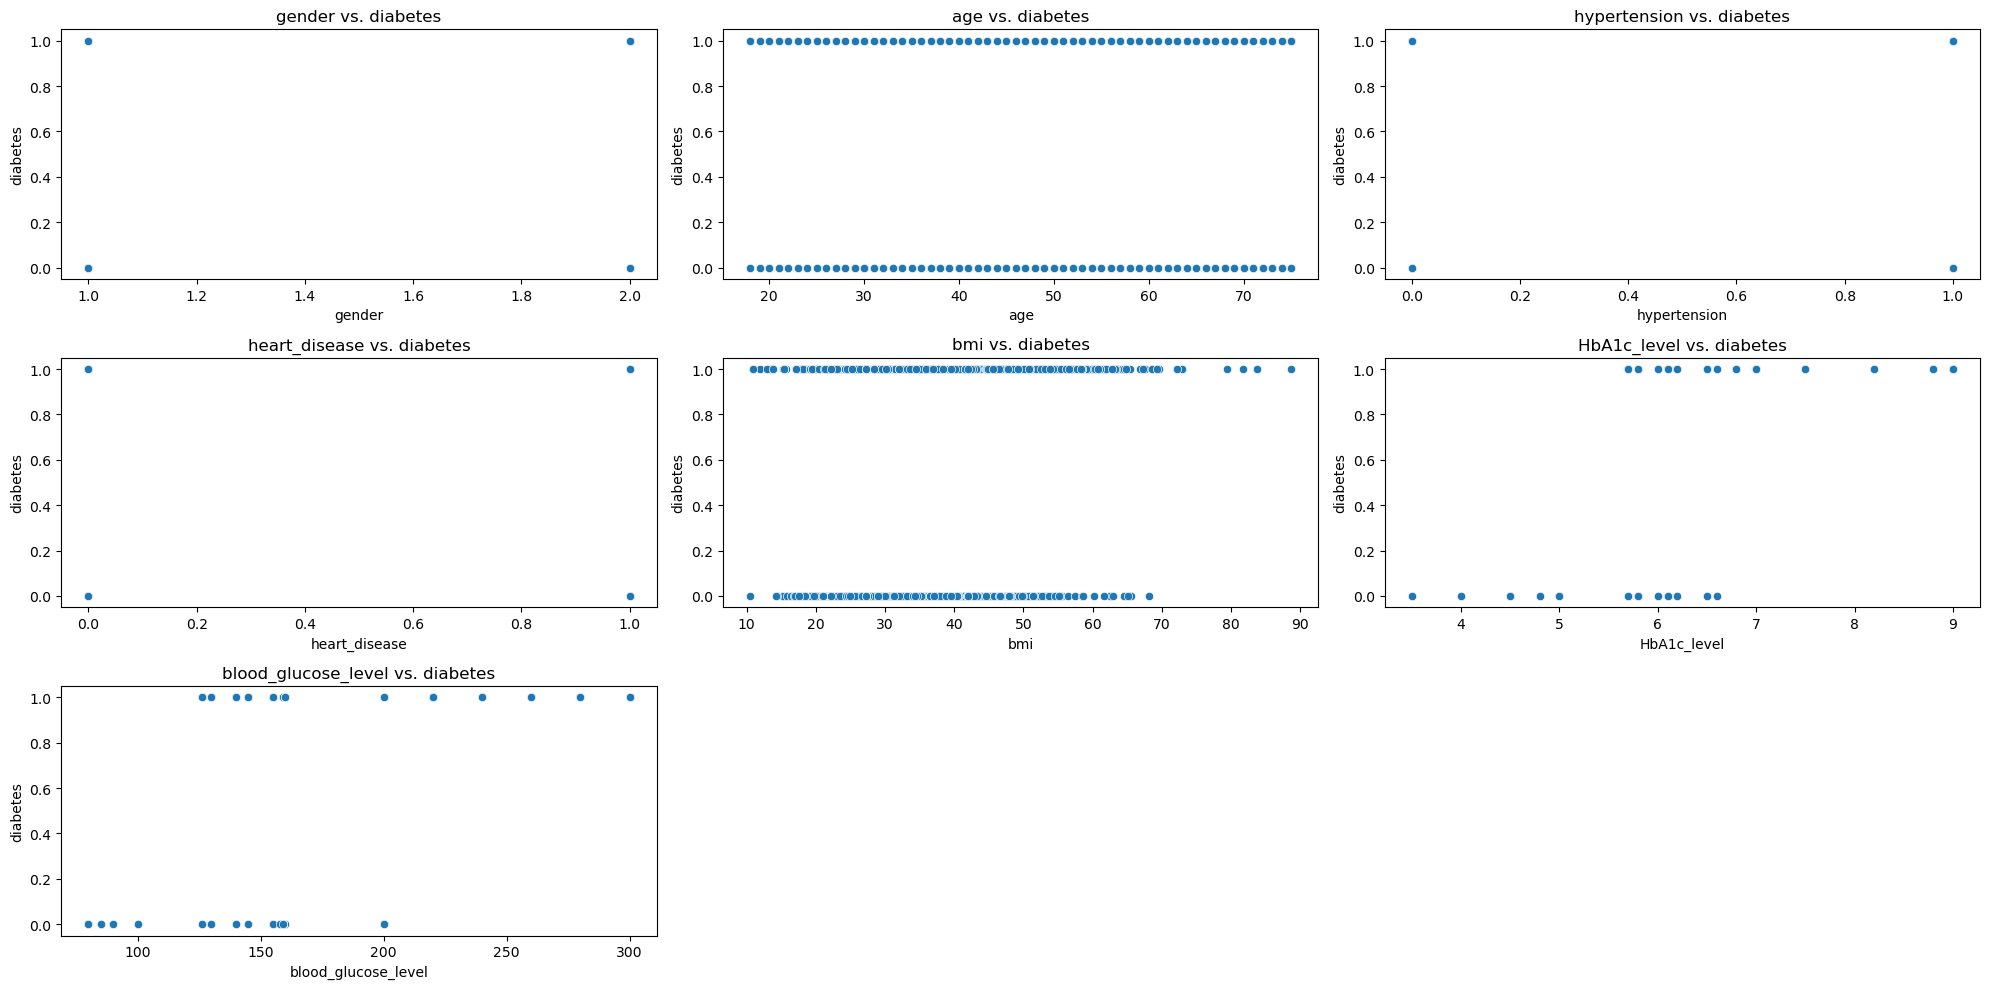

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Convert X_resampled to a DataFrame and concatenate with y_resampled
resampled_df = pd.DataFrame(X_resampled, columns=df.drop(target_variable, axis=1).columns)
resampled_df[target_variable] = y_resampled

# List of features , plot against the target variable
features = resampled_df.columns.drop(target_variable)

# Setting up the matplotlib figure
plt.figure(figsize=(20, 10))

# Looping through and creating a scatter plot for each feature
for i, feature in enumerate(features):
    plt.subplot(3, (len(features) + 2) // 3, i + 1)  # Adjust the grid size based on your number of features
    sns.scatterplot(x=resampled_df[feature], y=resampled_df[target_variable])
    plt.title(f'{feature} vs. {target_variable}')

plt.tight_layout()
plt.show()


#### Logistic Regression 

In [46]:
# Train the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression Model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

# Document the results
optimization_results = pd.concat([optimization_results,
                                  pd.DataFrame({'Model': ['Logistic Regression'],
                                                'Parameters': [logistic_model.get_params()],
                                                'Accuracy': [accuracy_logistic]})],
                                  ignore_index=True)

# Print evaluation metrics for Logistic Regression Model
print("Logistic Regression Model:")
print(f'Accuracy: {accuracy_logistic}')
print(f'Confusion Matrix:\n{conf_matrix_logistic}')
print(f'Classification Report:\n{classification_report_logistic}')

Logistic Regression Model:
Accuracy: 0.8723015001829492
Confusion Matrix:
[[1206  163]
 [ 186 1178]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1369
           1       0.88      0.86      0.87      1364

    accuracy                           0.87      2733
   macro avg       0.87      0.87      0.87      2733
weighted avg       0.87      0.87      0.87      2733



#### Random Forest 

In [47]:
# Train the Random Forest Model with hyperparameter tuning using GridSearchCV
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'max_features': ['sqrt', 'log2']}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_resampled, y_resampled)
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Evaluate Random Forest Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Document the results
optimization_results = pd.concat([optimization_results,
                                  pd.DataFrame({'Model': ['Random Forest'],
                                                'Parameters': [best_params_rf],
                                                'Accuracy': [accuracy_rf]})],
                                  ignore_index=True)

print("Random Forest Model:")
print(f'Best Parameters: {best_params_rf}')
print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{classification_report_rf}')

Random Forest Model:
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Accuracy: 0.9055982436882547
Confusion Matrix:
[[1241  128]
 [ 130 1234]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1369
           1       0.91      0.90      0.91      1364

    accuracy                           0.91      2733
   macro avg       0.91      0.91      0.91      2733
weighted avg       0.91      0.91      0.91      2733



#### Support Vector Machine 

In [48]:
# Train the Support Vector Machine Model
svm_model = SVC(probability=True)  
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM Model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

# Document the results
optimization_results = pd.concat([optimization_results,
                                  pd.DataFrame({'Model': ['SVM'],
                                                'Parameters': [svm_model.get_params()],
                                                'Accuracy': [accuracy_svm]})],
                                  ignore_index=True)

# Print evaluation metrics for SVM Model
print("Support Vector Machine Model:")
print(f'Accuracy: {accuracy_svm}')
print(f'Confusion Matrix:\n{conf_matrix_svm}')
print(f'Classification Report:\n{classification_report_svm}')

Support Vector Machine Model:
Accuracy: 0.8510793999268204
Confusion Matrix:
[[1138  231]
 [ 176 1188]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1369
           1       0.84      0.87      0.85      1364

    accuracy                           0.85      2733
   macro avg       0.85      0.85      0.85      2733
weighted avg       0.85      0.85      0.85      2733



#### Decision trees 

In [49]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model using cross-validation
dt_scores = cross_val_score(dt_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
mean_dt_score = dt_scores.mean()
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Document the results
optimization_results = pd.concat([optimization_results,
                                  pd.DataFrame({'Model': ['Decision Tree'],
                                                'Parameters': [dt_model.get_params()],
                                                'Accuracy': [mean_dt_score]})],
                                  ignore_index=True)

print("Decision Tree Model:")
print(f'Mean Cross-Validation Accuracy: {mean_dt_score}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report_str}')

Decision Tree Model:
Mean Cross-Validation Accuracy: 0.866144632143655
Confusion Matrix:
[[1196  173]
 [ 165 1199]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1369
           1       0.87      0.88      0.88      1364

    accuracy                           0.88      2733
   macro avg       0.88      0.88      0.88      2733
weighted avg       0.88      0.88      0.88      2733



In [50]:
# Export the optimization results to a CSV file
optimization_results.to_csv('optimization_results.csv', index=False)

data = pd.read_csv("optimization_results.csv")

data

,Model,Parameters,Accuracy
0,Logistic Regression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.872302
1,Random Forest,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.905598
2,SVM,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.851079
3,Decision Tree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.866145


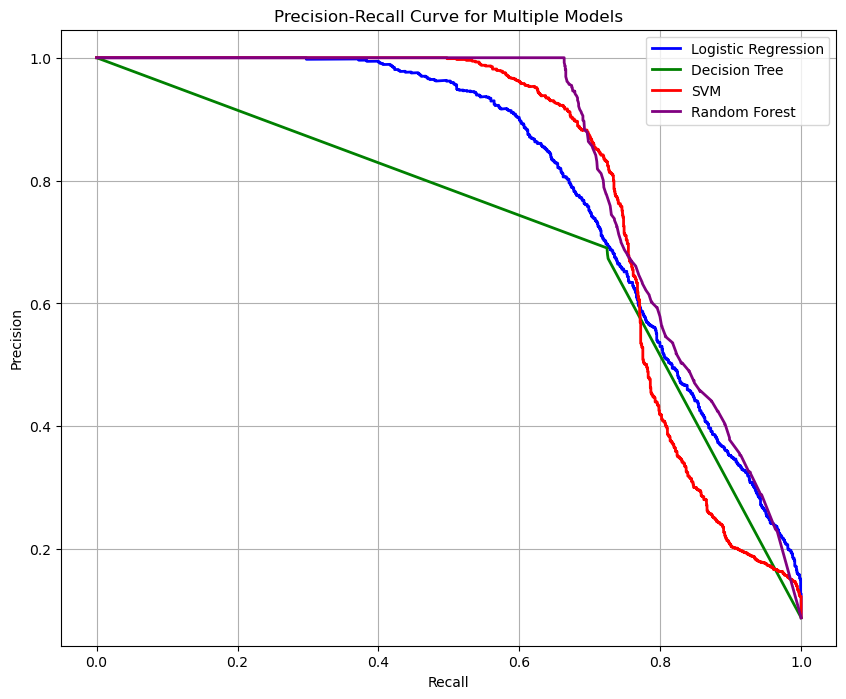

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import pandas as pd



# Prepare the data
X = df.drop('diabetes', axis=1) 
y = df['diabetes']  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
logistic_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

logistic_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Get predicted probabilities
y_scores_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_scores_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
y_scores_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
y_scores_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate Precision-Recall curve for each model
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, y_scores_logistic)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_scores_dt)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_scores_svm)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)

# Plotting the Precision-Recall curve for all models
plt.figure(figsize=(10, 8))
plt.plot(recall_logistic, precision_logistic, color='blue', lw=2, label='Logistic Regression')
plt.plot(recall_dt, precision_dt, color='green', lw=2, label='Decision Tree')
plt.plot(recall_svm, precision_svm, color='red', lw=2, label='SVM')
plt.plot(recall_rf, precision_rf, color='purple', lw=2, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiple Models')
plt.legend()
plt.grid(True)
plt.show()


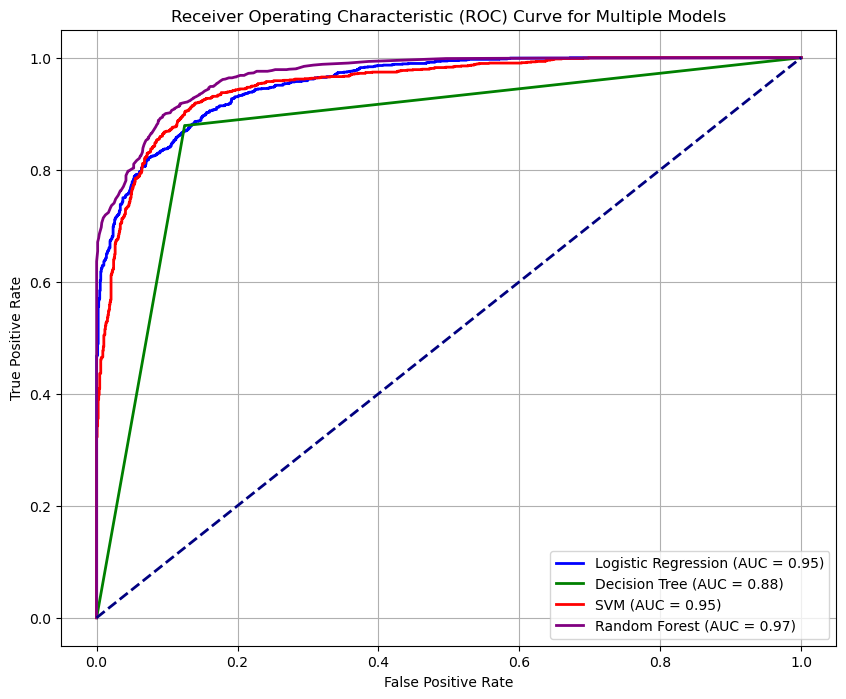

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import pandas as pd



# Prepare the data
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Undersample the majority class (non-diabetes)
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Splitting Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
logistic_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

logistic_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Get predicted probabilities
y_scores_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_scores_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
y_scores_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
y_scores_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and ROC AUC for each model
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_scores_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC curve for all models
plt.figure(figsize=(10, 8))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiple Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [19]:
import pandas as pd

# Create a dictionary to hold the data
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine (SVM)', 'Decision Tree'],
    'Accuracy': ['87.23%', '90.05%', '85.11%', '87.63%'],
    'Precision (Avg)': ['87.5%', '90%', '85.5%', '87.5%'],
    'Recall (Avg)': ['87%', '90%', '85%', '87.5%'],
    'F1-Score (Avg)': ['87.25%', '90%', '85.25%', '87.75%']
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Style the DataFrame
styled_df = df.style\
    .hide(axis="index")\
    .set_table_attributes('style="border-collapse: collapse; border: 1px solid black;"')\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', 'lightblue'), ('border', '1px solid black')]
    },
    {
        'selector': 'td',
        'props': [('border', '1px solid black')]
    }])

# Display the styled DataFrame
styled_df


Model,Accuracy,Precision (Avg),Recall (Avg),F1-Score (Avg)
Logistic Regression,87.23%,87.5%,87%,87.25%
Random Forest,90.05%,90%,90%,90%
Support Vector Machine (SVM),85.11%,85.5%,85%,85.25%
Decision Tree,87.63%,87.5%,87.5%,87.75%


|                        | Predicted: Diabetic                           | Predicted: Non-Diabetic                      |
|------------------------|:---------------------------------------------:|:--------------------------------------------:|
| **Actual: Diabetic**   | TP: Correctly identified diabetic            | FN: Incorrectly identified as non-diabetic   |
| **Actual: Non-Diabetic** | FP: Incorrectly identified as diabetic     | TN: Correctly identified non-diabetic        |


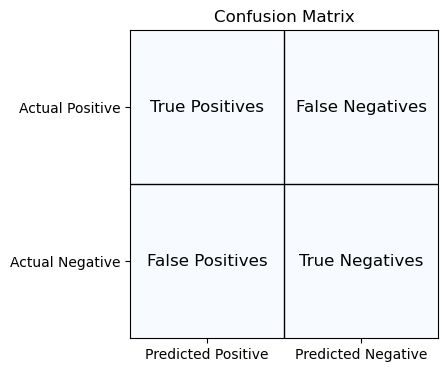

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Create an empty confusion matrix
confusion_matrix = np.array([[0, 0],
                              [0, 0]])

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot confusion matrix
ax.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')

# Add horizontal and vertical lines to split the 4 boxes
ax.axhline(0.5, color='black', linewidth=1)
ax.axvline(0.5, color='black', linewidth=1)

# Display labels for TP, TN, FP, FN in the cells
ax.text(0.25, 0.25, 'True Positives', ha='center', va='center', color='black', fontsize=12)
ax.text(0.75, 0.25, 'False Negatives', ha='center', va='center', color='black', fontsize=12)
ax.text(0.25, 0.75, 'False Positives', ha='center', va='center', color='black', fontsize=12)
ax.text(0.75, 0.75, 'True Negatives', ha='center', va='center', color='black', fontsize=12)

# Set axis limits and ticks
ax.set_xlim(0, 1)
ax.set_ylim(1, 0)
ax.set_xticks([0.25, 0.75])
ax.set_yticks([0.25, 0.75])
ax.set_xticklabels(['Predicted Positive', 'Predicted Negative'])
ax.set_yticklabels(['Actual Positive', 'Actual Negative'])

plt.title('Confusion Matrix')
plt.show()







In [21]:
import pandas as pd

# Create a dictionary to hold the data
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Support'],
    'Description': [
        "Precision measures how accurately the model identifies positive cases without making false positive errors.",
        "Recall assesses the model's ability to find all actual positive cases without missing any (minimizing false negatives).",
        "The F1-Score is a balance between precision and recall, providing a holistic measure of model performance.",
        "Support indicates the number of actual occurrences of each class, providing context for the other metrics."
    ],
}

# Create a DataFrame from the dictionary with the description column first
classification_report_df = pd.DataFrame(data)

# Style the DataFrame
styled_df = classification_report_df.style\
    .set_properties(**{'text-align': 'left'}, subset=['Description'])\
    .set_table_attributes('style="border-collapse: collapse; border: 1px solid black;"')\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', 'lightblue'), ('border', '1px solid black'), ('text-align', 'left')]
    },
    {
        'selector': 'td',
        'props': [('border', '1px solid black')]
    }])\
    .hide_index()\
    .format({'Description': lambda x: f'<i>{x}</i>'})

# Display the styled DataFrame
styled_df


C:\Users\User\AppData\Local\Temp\ipykernel_3012\2343998339.py:29: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .hide_index()\


Metric,Description
Precision,Precision measures how accurately the model identifies positive cases without making false positive errors.
Recall,Recall assesses the model's ability to find all actual positive cases without missing any (minimizing false negatives).
F1-Score,"The F1-Score is a balance between precision and recall, providing a holistic measure of model performance."
Support,"Support indicates the number of actual occurrences of each class, providing context for the other metrics."


In [22]:
import pandas as pd

# Create a dictionary to hold the data
data = {
    'Description': [
        "Precision measures how accurately the model identifies positive cases without making false positive errors.",
        "Recall assesses the model's ability to find all actual positive cases without missing any (minimizing false negatives).",
        "The F1-Score is a balance between precision and recall, providing a holistic measure of model performance.",
        "Support indicates the number of actual occurrences of each class, providing context for the other metrics."
    ],
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Support'],
}

# Create a DataFrame from the dictionary with the description column first
classification_report_df = pd.DataFrame(data)

# Style the DataFrame
styled_df = classification_report_df.style\
    .set_properties(**{'text-align': 'left'}, subset=['Description'])\
    .set_table_attributes('style="border-collapse: collapse; border: 1px solid black;"')\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', 'lightblue'), ('border', '1px solid black'), ('text-align', 'left')]
    },
    {
        'selector': 'td',
        'props': [('border', '1px solid black')]
    }])\
    .hide_index()\
    .format({'Description': lambda x: f'<i>{x}</i>'})

# Display the styled DataFrame
styled_df


C:\Users\User\AppData\Local\Temp\ipykernel_3012\342035905.py:29: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .hide_index()\


Description,Metric
Precision measures how accurately the model identifies positive cases without making false positive errors.,Precision
Recall assesses the model's ability to find all actual positive cases without missing any (minimizing false negatives).,Recall
"The F1-Score is a balance between precision and recall, providing a holistic measure of model performance.",F1-Score
"Support indicates the number of actual occurrences of each class, providing context for the other metrics.",Support
